# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [13]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [14]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)
df = insurance.copy()

# TODO: Display first 5 rows
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [28]:
# TODO: Print dataset info

df.info()
# TODO: Print descriptive statistics

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Define Features and Target

In [16]:
from re import X
from pandas.core.arrays import numeric
# TODO: Set numeric and categorical feature lists
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]
# TODO: Define target column
target_column = "charges"

# TODO: Create X and y
X=df.drop(columns=target_column)
y=df[target_column]

# TODO: Display X head

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Train Test Split

In [17]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((1070,), (268,))

## Multiple Linear Regression Pipeline

In [18]:
from numpy._core import multiarray
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
lin_reg = LinearRegression()
mlr_model = Pipeline(steps=[("preprocess", preprocess), ("linreg", lin_reg)])

# TODO: Fit the model
mlr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linreg', LinearRegression())])

## Regression Performance Function

In [19]:
# TODO: Complete function to print performance
def reg_performance(y_true, y_pred, set_name="Data"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"--- Performance on {set_name} ---")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R2:   {r2:.4f}")
    print("\n")

## Evaluate Model

In [20]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
reg_performance(y_train, y_train_pred, "Train")
reg_performance(y_test, y_test_pred, "Test")


--- Performance on Train ---
MSE:  37277681.70
RMSE: 6105.55
MAE:  4208.23
R2:   0.7417


--- Performance on Test ---
MSE:  33596915.85
RMSE: 5796.28
MAE:  4181.19
R2:   0.7836




## Inspect Coefficients

In [21]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)


Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

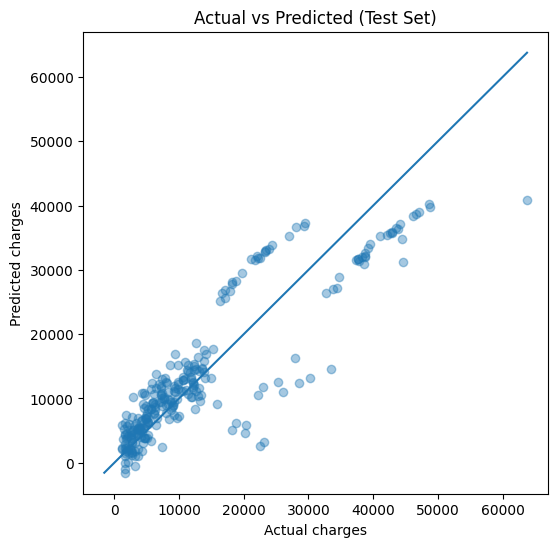

In [22]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

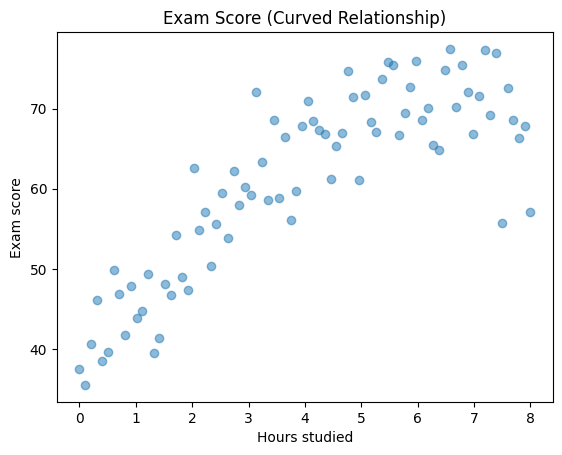

In [23]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [29]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [32]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TODO: Create helper to fit polynomial model
def fit_poly_model(degree, X_train, y_train, X_test, y_test):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = lin_reg.predict(X_train_poly)
    y_test_pred = lin_reg.predict(X_test_poly)

    # Print performance using the existing reg_performance function
    print(f"\n--- Degree {degree} Polynomial Regression ---")
    reg_performance(y_train, y_train_pred, "Train")
    reg_performance(y_test, y_test_pred, "Test")

    # Calculate metrics to return for plotting and further analysis
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return {
        "degree": degree,
        "model": lin_reg,
        "poly_features": poly_features,
        "y_train_pred": y_train_pred,
        "y_test_pred": y_test_pred,
        "train_performance": {"mse": train_mse, "rmse": train_rmse, "mae": train_mae, "r2": train_r2},
        "test_performance": {"mse": test_mse, "rmse": test_rmse, "mae": test_mae, "r2": test_r2},
    }

In [34]:
# TODO: Fit models for degrees 1, 2, 3, 8
results_degree1 = fit_poly_model(1, X_train_h, y_train_h, X_test_h, y_test_h)
results_degree2 = fit_poly_model(2, X_train_h, y_train_h, X_test_h, y_test_h)
results_degree3 = fit_poly_model(3, X_train_h, y_train_h, X_test_h, y_test_h)
results_degree8 = fit_poly_model(8, X_train_h, y_train_h, X_test_h, y_test_h)



--- Degree 1 Polynomial Regression ---
--- Performance on Train ---
MSE:  43.92
RMSE: 6.63
MAE:  5.39
R2:   0.6555


--- Performance on Test ---
MSE:  27.10
RMSE: 5.21
MAE:  3.67
R2:   0.7942



--- Degree 2 Polynomial Regression ---
--- Performance on Train ---
MSE:  23.27
RMSE: 4.82
MAE:  3.83
R2:   0.8175


--- Performance on Test ---
MSE:  18.53
RMSE: 4.31
MAE:  3.52
R2:   0.8593



--- Degree 3 Polynomial Regression ---
--- Performance on Train ---
MSE:  21.18
RMSE: 4.60
MAE:  3.82
R2:   0.8339


--- Performance on Test ---
MSE:  19.52
RMSE: 4.42
MAE:  3.38
R2:   0.8518



--- Degree 8 Polynomial Regression ---
--- Performance on Train ---
MSE:  18.89
RMSE: 4.35
MAE:  3.44
R2:   0.8519


--- Performance on Test ---
MSE:  24.29
RMSE: 4.93
MAE:  4.15
R2:   0.8156




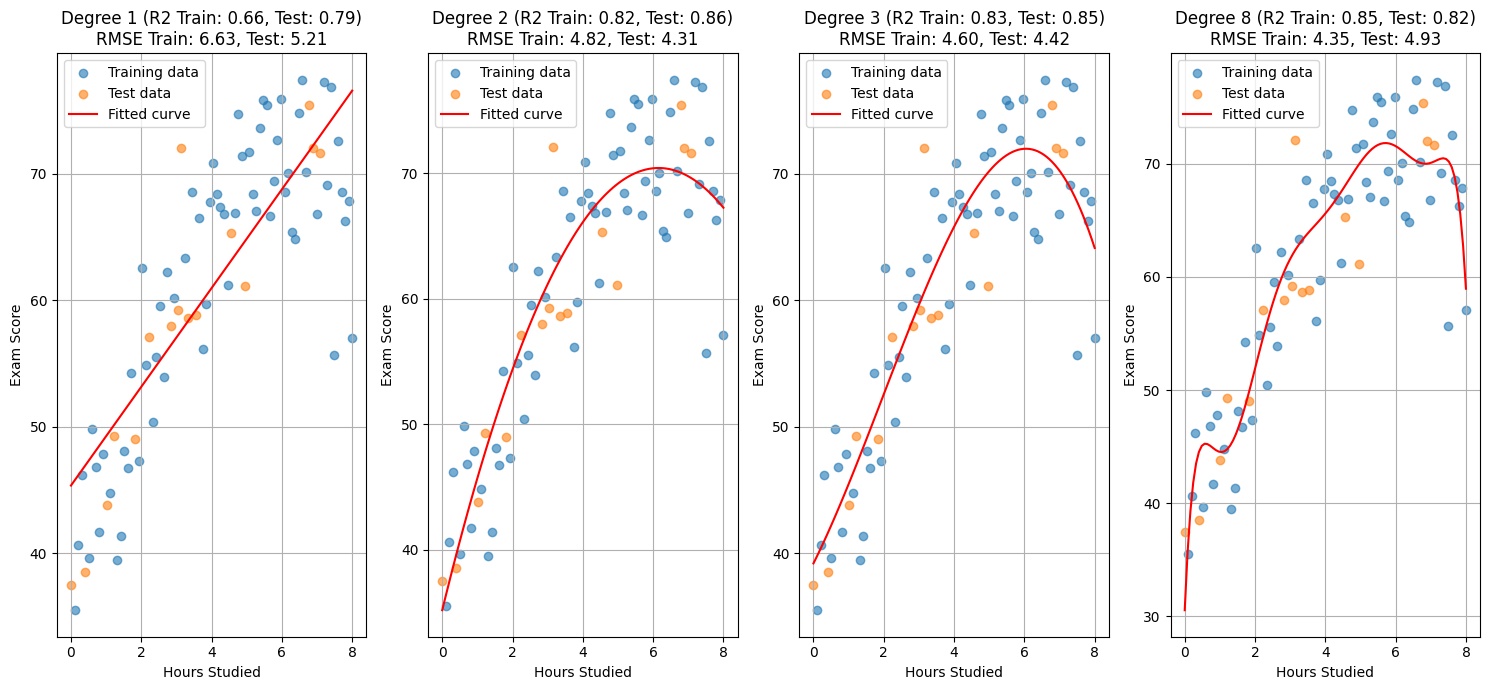

In [39]:
# TODO: Plot fitted curves for each degree (R2,RMSE)

plt.figure(figsize=(15, 7))

algorithms = [
    results_degree1,
    results_degree2,
    results_degree3,
    results_degree8,
]

for i, algo in enumerate(algorithms):
    plt.subplot(1, len(algorithms), i + 1)
    plt.scatter(X_train_h, y_train_h, label="Training data", alpha=0.6)
    plt.scatter(X_test_h, y_test_h, label="Test data", alpha=0.6)

    # Sort X_hours for a smooth curve
    X_fit = np.linspace(X_hours.min(), X_hours.max(), 100).reshape(-1, 1)
    X_fit_poly = algo["poly_features"].transform(X_fit)
    y_fit_pred = algo["model"].predict(X_fit_poly)

    plt.plot(X_fit, y_fit_pred, color="red", label="Fitted curve")

    plt.title(f"Degree {algo['degree']} (R2 Train: {algo['train_performance']['r2']:.2f}, Test: {algo['test_performance']['r2']:.2f})\nRMSE Train: {algo['train_performance']['rmse']:.2f}, Test: {algo['test_performance']['rmse']:.2f}")
    plt.xlabel("Hours Studied")
    plt.ylabel("Exam Score")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.


Answer:
1. The polynomial degree of 8 shows clear signs of overfitting. While its R2 on the training set (0.8519) is quite good and its RMSE is low (4.35), its performance on the test set drops significantly (R2: 0.8156, RMSE: 4.93). This indicates that the model has learned the noise and specific patterns of the training data too well, failing to generalize effectively to new, unseen data.
2.  The polynomial degree of 2 appears to give the best generalization. It achieves a high R2 on the test set (0.8593) and the lowest RMSE on the test set (4.31). Its training performance (R2: 0.8175, RMSE: 4.82) is also close to its test performance, suggesting a good balance between fitting the training data and generalizing to new data without overfitting.

3.  Things I learned:


*   Multiple Linear Regression (MLR): It's a simple and effective model when the underlying relationship between features and the target is linear. However, if the relationship is non-linear, as seen in our synthetic X_hours vs y_scores data, a pure linear model (degree 1 polynomial) will underfit the data.
*  Polynomial Regression: This technique allows linear models to capture non-linear relationships by introducing polynomial features. The key learning is about the bias-variance trade-off:
* A low-degree polynomial (like degree 1 in our second
example) might lead to high bias (underfitting), meaning the model is too simple to capture the underlying pattern. Both training and test scores will be relatively low.
*  A mid-degree polynomial (like degree 2) can strike a good balance, capturing the true underlying non-linear relationship without fitting to the noise. This results in good performance on both training and test sets, indicating good generalization.
*  A high-degree polynomial (like degree 8) can lead to high variance (overfitting). The model becomes too complex, fitting the training data (including its noise) almost perfectly, but performing poorly on new, unseen data. This demonstrates the importance of choosing an appropriate model complexity for the given data.




